## Рекомендация товаров

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events_df = pd.read_csv("events.csv")
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [3]:
events_df.shape

(2756101, 5)

In [4]:
events_df.visitorid.size

2756101

In [5]:
all_customers = events_df.visitorid.unique()
all_customers.size

1407580

In [6]:
customers_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customers_purchased.size

11719

In [8]:
customers_browsed = [x for x in all_customers if x not in customers_purchased]
len(customers_browsed)

1395861

In [9]:
events_df[events_df.visitorid == 102019].sort_values("timestamp")

,timestamp,visitorid,event,itemid,transactionid
19690,1433175714335,102019,view,49521,NaN
19501,1433175801314,102019,addtocart,49521,NaN
14842,1433175812596,102019,view,150318,NaN
19573,1433175871497,102019,view,49521,NaN
8701,1433175894837,102019,view,49521,NaN
19708,1433175945872,102019,view,150318,NaN
8740,1433176042269,102019,view,49521,NaN
814,1433176736375,102019,transaction,150318,13556.0
19724,1433176736422,102019,transaction,49521,13556.0


In [10]:
events_df["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [12]:
events_count = events_df["event"].value_counts()
events_count

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

<BarContainer object of 2 artists>

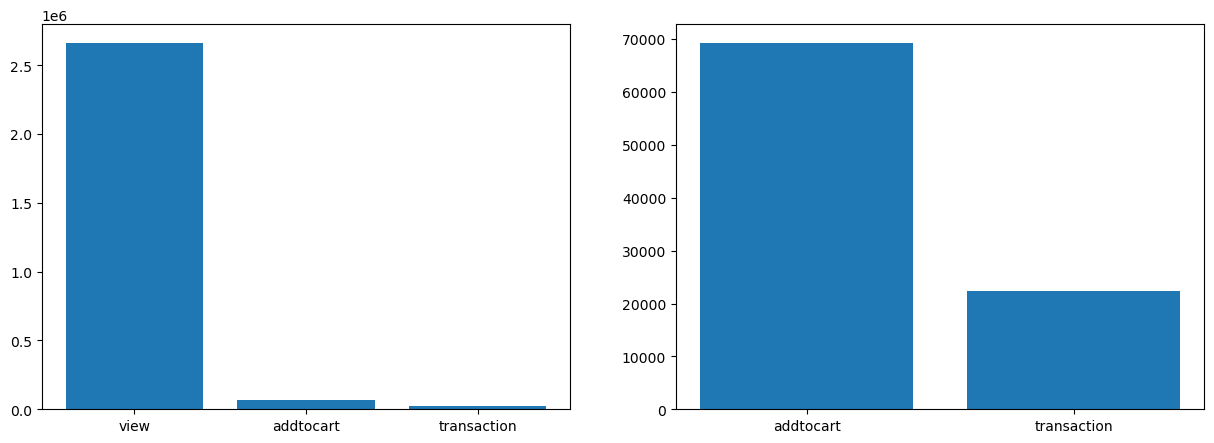

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(events_count.index, events_count.values)

plt.subplot(1,2,2)
plt.bar(events_count.index[1:], events_count.values[1:])

In [14]:
events_df["transactionid"].dropna().shape[0]

22457

In [15]:
events_df["transactionid"].dropna().unique().shape[0]

17672

In [16]:
events_df["itemid"].size

2756101

In [17]:
events_df["itemid"].unique().size

235061

In [18]:
grouped = events_df.groupby("event")["itemid"].apply(np.array)
grouped

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object

### Наиболее частые просмотры

<Axes: >

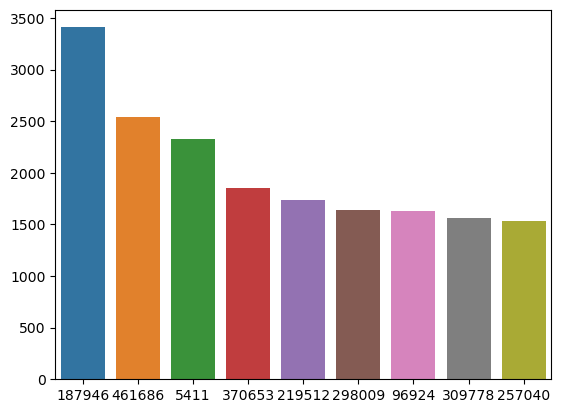

In [21]:
import operator
views = grouped["view"]
count_view = {}
views = np.array(views[:])
unique, counts = np.unique(views, return_counts=True)
count_view = dict(zip(unique, counts))
sort_count_view = sorted(count_view.items(), key=operator.itemgetter(1), reverse=True)
x = [i[0] for i in sort_count_view[:9]]
y = [i[1] for i in sort_count_view[:9]]
sns.barplot(x=x,y=y,order=x)

### Наиболее частые добавления в корзину

<Axes: >

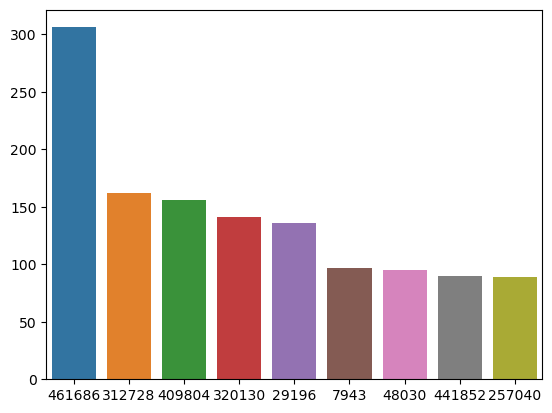

In [26]:
addtocart = grouped["addtocart"]
count_addtocart = {}
addtocart = np.array(addtocart[:])
unique, counts = np.unique(addtocart, return_counts=True)
count_addtocart = dict(zip(unique, counts))
sort_count_addtocart = sorted(count_addtocart.items(), key=operator.itemgetter(1), reverse=True)
x = [i[0] for i in sort_count_addtocart[:9]]
y = [i[1] for i in sort_count_addtocart[:9]]
sns.barplot(x=x,y=y,order=x)

### Наиболее частые покупки

<Axes: >

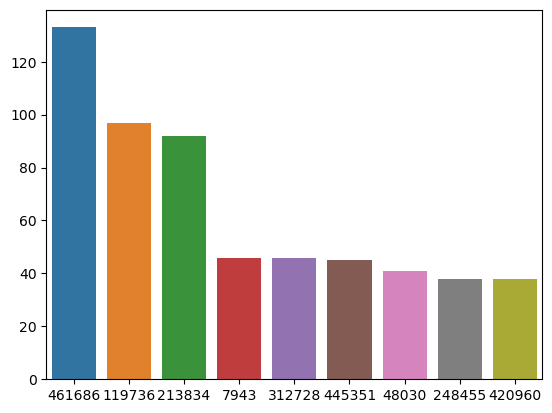

In [27]:
transaction = grouped["transaction"]
count_transaction = {}
transaction = np.array(transaction[:])
unique, counts = np.unique(transaction, return_counts=True)
count_transaction = dict(zip(unique, counts))
sort_count_transaction = sorted(count_transaction.items(), key=operator.itemgetter(1), reverse=True)
x = [i[0] for i in sort_count_transaction[:9]]
y = [i[1] for i in sort_count_transaction[:9]]
sns.barplot(x=x,y=y,order=x)

### Построение рекоммендации

In [28]:
customers_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()

purchased_items = []

for customer in customers_purchased:
    purchased_items.append(list(events_df.loc[(events_df.visitorid == customer) & (events_df.transactionid.notnull())].itemid.values))
    

In [30]:
purchased_items[:7]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044],
 [54058,
  284871,
  251130,
  268335,
  183049,
  261940,
  369093,
  370745,
  192990,
  277119,
  241716,
  283766,
  16417,
  217068,
  36372,
  68923,
  428015,
  69533,
  13520,
  385638,
  442871,
  136526,
  247862,
  93828,
  230911,
  382595,
  34853,
  216260,
  154812,
  445241,
  57702,
  347850,
  151855,
  226327,
  288525,
  51354,
  345994,
  170438,
  254301,
  266439,
  193718,
  388558,
  26745,
  184086,
  79956,
  252040,
  82232,
  309821,
  394518,
  462070,
  331980,
  353111,
  200527,
  235933,
  68532,
  358882,
  60012,
  29741,
  270487,
  163689,
  6913,
  156457,
  341578,
  163352,
  234493,
  135174,
  452481,
  241755,
  56323,
  210137,
  184397,
  285202,
  198690,
  195958,
  239210,
  71640,
  189108,
  369112,
  346186,
  211207,
  134330,
  257070,
  302239,
  459480,
  57577,
  1952

In [33]:
def recommend_items(item_id, purchased_items):
    recomendation_list = []
    for x in purchased_items:
        if item_id in x:
            recomendation_list += x
    
    recomendation_list = list(set(recomendation_list) - set([item_id]))
    return recomendation_list

In [34]:
recommend_items(200793, purchased_items)

[105792, 12836, 80582, 380775, 15335, 400969, 25353, 302422, 237753, 317178]

In [36]:
recommend_items(461686, purchased_items)

[348162,
 450565,
 323599,
 172063,
 45089,
 352290,
 299044,
 172068,
 262186,
 225329,
 106547,
 122931,
 110645,
 122941,
 438338,
 110666,
 450641,
 8278,
 114786,
 258148,
 434277,
 176231,
 122984,
 36972,
 213102,
 348272,
 319602,
 98422,
 45175,
 303229,
 114814,
 110720,
 118914,
 413834,
 438412,
 376974,
 135311,
 368788,
 254101,
 315543,
 24728,
 8347,
 299164,
 331937,
 454818,
 37029,
 168,
 409770,
 213172,
 377018,
 270525,
 241853,
 458945,
 98498,
 164035,
 176323,
 336069,
 4289,
 245960,
 37068,
 409804,
 438484,
 102614,
 12504,
 82141,
 114913,
 131298,
 57577,
 225514,
 176363,
 123127,
 139515,
 176385,
 45317,
 61705,
 180492,
 266512,
 241940,
 413986,
 123175,
 209204,
 319797,
 94521,
 266553,
 213306,
 356668,
 33087,
 373064,
 246090,
 385355,
 438603,
 41295,
 254290,
 188754,
 57686,
 282966,
 242007,
 4442,
 393562,
 442721,
 442725,
 340329,
 180588,
 33139,
 274804,
 242035,
 373108,
 373107,
 90487,
 299384,
 352634,
 360825,
 57723,
 344446,
 3608